## Imports

***

Let's import the following packages which will be used throughout this notebook:

- [Pandas](https://pandas.pydata.org/docs/index.html) enables us to load tabular data (such as a csv file) as a DataFrame and perform analysis on the data.
- [Numpy](https://numpy.org/) enables us to store data as arrays and process these in a performant manner.
- [Matplotlib.pyplot](https://matplotlib.org/stable/api/pyplot_summary.html) enables us to create visualizations such as bar charts, histograms and scatterplots.
- [Seaborn](https://seaborn.pydata.org/) is a data visualization library built on top of matplotlib.
- [Train_Test_Split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) sci-kit learn model for splitting data into train/test subsets.
- [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) sci-kit learn's Logistic Regression classifier.
- [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) sk learn's confusion matrix calculator to assess accuracy of classification.
- [Accuracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) sk learn's Accuracy classification score.

In [163]:
# Import packages required.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score

## Data Load & Overview

***

The [UCI machine learning repository](https://archive.ics.uci.edu/dataset/53/iris) does not come in the easiest format to interact with the data. To save ourselves some data wrangling, let's create a DataFrame directly from the [Seaborn repository](https://github.com/mwaskom/seaborn-data/blob/master/iris.csv), and save it in our working directory so that we have a local copy.

In [99]:
# Create a pandas DataFrame from the iris.csv file (sourced from the Seaborn Repository linked above).
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

In [100]:
# Write this DataFrame to our working directory 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html
df.to_csv('iris.csv')

The data is now loaded and we can generate an overview by printing the Data Frame to our console. (The Data Frame is truncated to display the first 5 and last 5 records)

In [101]:
# Let's have an initial look. 
# https://pandas.pydata.org/docs/user_guide/dsintro.html#console-display
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [102]:
# Let's generate some general information on the data
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


We can see from the above table there are 150 rows (records), each representing an individual flower, and 5 columns (variables). Of the 5 columns, 1 is categorical (species) and the rest are numeric. In the next section, we generate descriptive statistics on the categorical and numerical variables, printing summaries to a text (.csv) file.

## Variable Summary

***

Let's begin by splitting up our DataFrame into numerical, and non numerical, data.

In machine learning terminology, we are splitting the DataFrame into 'features' and 'target'.

In [128]:
X = df.select_dtypes(float)
y = df.select_dtypes(object)

pandas.core.frame.DataFrame

First, we inspect the categorigal variable (species).

In [104]:
# Generate descriptive statistics for the Iris categorical column 'species', and transpose for ease of reading.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html
y_stats = y.describe().T
y_stats

,count,unique,top,freq
species,150,3,setosa,50


The above output confirms we have 150 different specie values in our data, with 3 unique species. It suggests the setosa species is the most frequent, observed 50 times in our data. Basic Math implies one of the other species must occur at least 50 times, if not more, so let's dig into this further.

In [105]:
# Count specie values.
y_counts = y.value_counts()
y_counts

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

The explanation is within the Notes section of the [official documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html): _"If multiple object values have the highest count, then the count and top results will be arbitrarily chosen from among those with the highest count."_

Let's update cat_info with this information.

In [106]:
# Update single value of the cat_info DataFrame via integer position, and transpose for ease of reading.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iat.html
y_stats.iat[0,2] = 'setosa, versicolor, virginica'
y_stats

,count,unique,top,freq
species,150,3,"setosa, versicolor, virginica",50


Now that we have our summary on the 'species' variable, let's write to a csv.

In [108]:
# Create file called variable.csv, write a line of text and add a line break.
with open("variable_summary.csv", "w") as f:
    f.write("Summary of Iris categorical column below:" +"\n" +"\n")

In [109]:
# Append DataFrame to variable_summary.csv
# https://www.geeksforgeeks.org/how-to-append-pandas-dataframe-to-existing-csv-file/
y_stats.to_csv('variable_summary.csv', mode='a')

Next, let's generate descriptive statistics on the numeric variables, in the same manner we have done above.

In [110]:
# Generate descriptive statistics for the numerical subset of the Iris DataFrame.
X.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [111]:
# Let's customize the stats on display 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html
X_stats = X.agg(['min', 'mean', 'median', 'std', 'max', 'skew', 'kurtosis']).T
X_stats

,min,mean,median,std,max,skew,kurtosis
sepal_length,4.3,5.843333,5.80,0.828066,7.9,0.314911,-0.552064
sepal_width,2.0,3.057333,3.00,0.435866,4.4,0.318966,0.228249
petal_length,1.0,3.758000,4.35,1.765298,6.9,-0.274884,-1.402103
petal_width,0.1,1.199333,1.30,0.762238,2.5,-0.102967,-1.340604


Let's create two additional columns in our DataFrame by calculating +/- 3 standard deviations from the mean. This helps us identify if there any outliers in the data, by observing if any of the min or max values fall outside this range.

In [112]:
# Create two new series, calculated from the existing 'mean' and 'std' series,  and add them to our X_stats DataFrame
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mul.html
X_stats['mean+3*std'] = X_stats['mean'] + X_stats['std'].mul(3)
X_stats['mean-3*std'] = X_stats['mean'] - X_stats['std'].mul(3)
X_stats

,min,mean,median,std,max,skew,kurtosis,mean+3*std,mean-3*std
sepal_length,4.3,5.843333,5.80,0.828066,7.9,0.314911,-0.552064,8.327532,3.359135
sepal_width,2.0,3.057333,3.00,0.435866,4.4,0.318966,0.228249,4.364932,1.749734
petal_length,1.0,3.758000,4.35,1.765298,6.9,-0.274884,-1.402103,9.053895,-1.537895
petal_width,0.1,1.199333,1.30,0.762238,2.5,-0.102967,-1.340604,3.486046,-1.087380


In [79]:
# Re-oder the above Dataframe for ease of reading
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reindex.html
X_stats = X_stats.reindex(columns=['mean-3*std', 'min', 'mean', 'median', 'max', 'mean+3*std', 'skew', 'kurtosis'])
X_stats

,mean-3*std,min,mean,median,max,mean+3*std,skew,kurtosis
sepal_length,3.359135,4.3,5.843333,5.80,7.9,8.327532,0.314911,-0.552064
sepal_width,1.749734,2.0,3.057333,3.00,4.4,4.364932,0.318966,0.228249
petal_length,-1.537895,1.0,3.758000,4.35,6.9,9.053895,-0.274884,-1.402103
petal_width,-1.087380,0.1,1.199333,1.30,2.5,3.486046,-0.102967,-1.340604


We can see that there are no outliers to the left hand side of the distributions. (Mean- 3 x std < minimum for all 4 variables).\
There is at least one sepal width measurement which (marginally) exceeds our outlier threshold (max of 4.4 > mean + 3 x std of 4.37). The other variables do not contain outliers.

In [162]:
# Check how many outliers are present in sepal width
X['sepal_width'].sort_values(ascending=False)


15     4.4
33     4.2
32     4.1
14     4.0
16     3.9
      ... 
87     2.3
62     2.2
68     2.2
119    2.2
60     2.0
Name: sepal_width, Length: 150, dtype: float64

There is one (marginal) outlier within the dataset.

Now that we have our summary on the numeric variables, let's append to our 'variable_summary.csv' file.

In [113]:
#  Add line of text and add a line break.
with open("variable_summary.csv", "a") as f:
    f.write("\n" + "Summary of Iris numerical columns below:" + "\n" +"\n")

In [114]:
# Append DataFrame to variable_summary.csv
X_stats.to_csv('variable_summary.csv', mode='a')

In summary, we have 5 variables: one categorical (species) and four numerical (sepal length, sepal width, petal length and petal width). There are no missing values in the dataset. The categorical observations are evenly distributed (50 observations per species). For the numerical data, the data is centred around the mean with only one outlier identified using three standard deviations as the cut off. In terms of distribution, there is low [skewness](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html) (values between -.5 and .5), and three of the distributions have lower [kurtosis](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.kurtosis.html) than a normal distribution. We will visualise the distributions in the next section.

## Visualizations

***

Note: The histograms and scatterplots generated in this section can be created with much fewer lines of code using the Seaborn library. I have relied on the numpy and matplotlib libraries to gain an understanding of what is "going on under the hood". I also appreciate that the code used to generate the plots are not the most efficient. 

#### Histograms

***

Histograms are suitable for visualizing continuous distributions. Let's visualise our data using histograms to display:
1. The distribution of the sepal lengths, sepal widths, petal lengths and petal widths.
2. Same as (1) but categorised by Iris species.

Both histograms are saved down as .png files.

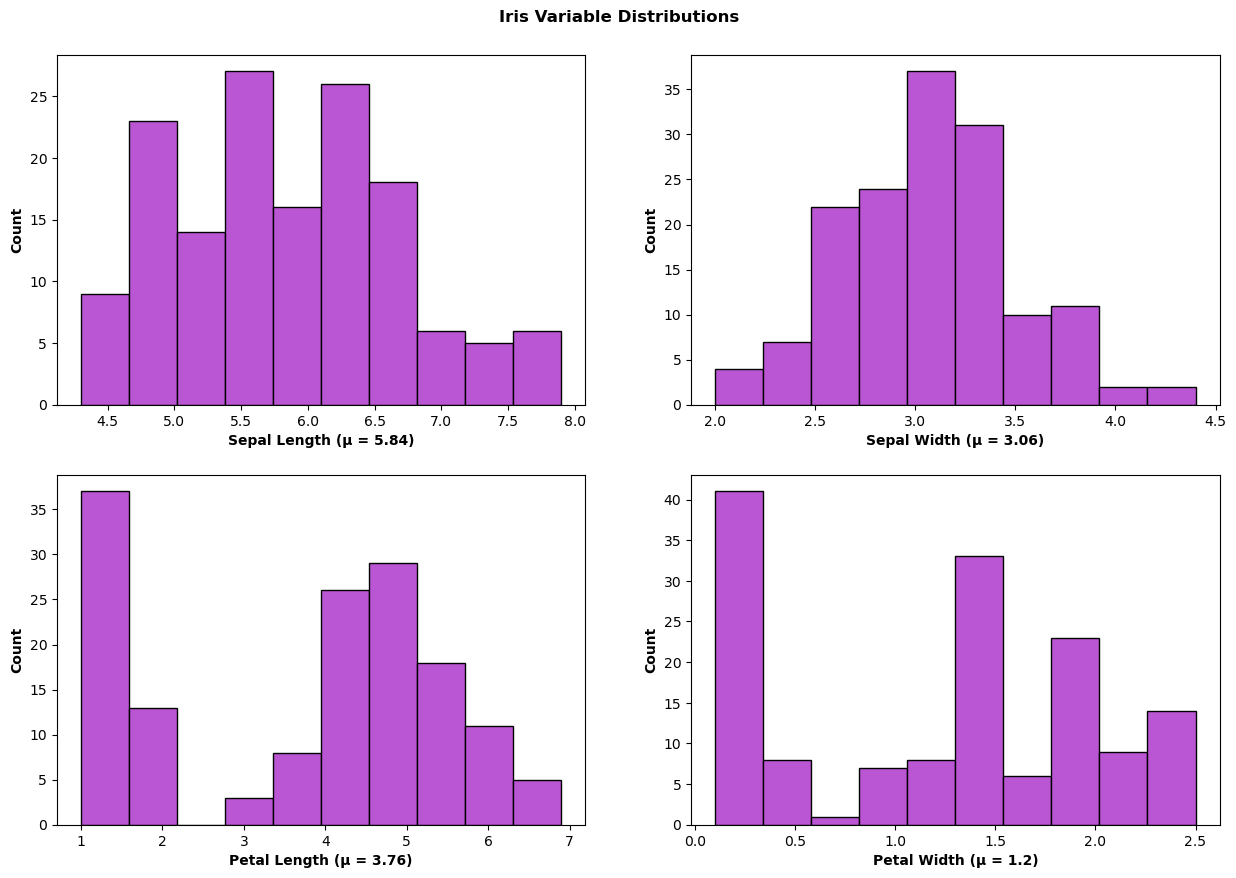

In [115]:
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplot.html
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_adjust.html
# https://matplotlib.org/stable/gallery/statistics/hist.html

# Create a new figure and sets of axes, split into 2 rows and 2 columns.
fig, ax = plt.subplots(2,2)

# Set figure title & size.
fig.suptitle('Iris Variable Distributions', y=.925,fontweight = 900)
fig.set_figheight(10)
fig.set_figwidth(15)

# Plot histograms of the four variables.
ax[0,0].hist(df["sepal_length"], edgecolor='black', color="mediumorchid")
ax[0,1].hist(df["sepal_width"], edgecolor='black', color="mediumorchid")
ax[1,0].hist(df["petal_length"], edgecolor='black', color="mediumorchid")
ax[1,1].hist(df["petal_width"], edgecolor='black', color="mediumorchid")

# Set axis labels for four subplots.
ax[0,0].set_xlabel("Sepal Length (μ = 5.84)", fontweight = 550)
ax[0,0].set_ylabel("Count", fontweight = 550)
ax[0,1].set_xlabel("Sepal Width (μ = 3.06)", fontweight = 550)
ax[0,1].set_ylabel("Count", fontweight = 550)
ax[1,0].set_xlabel("Petal Length (μ = 3.76)", fontweight = 550)
ax[1,0].set_ylabel("Count", fontweight = 550)
ax[1,1].set_xlabel("Petal Width (μ = 1.2)", fontweight = 550)
ax[1,1].set_ylabel("Count", fontweight = 550)

# Save to png
plt.savefig('Iris_dist.png')

From the above distributions, both petal length and petal width appear to be bivariate, with two distiinct peaks / means.

Let's visualise the above categorised by species, but first we need to create DataFrames for the distinct species.

In [116]:
# Create subset dataframes for the different species
setosa_df = df[df["species"].str.contains("setosa")]
versicolor_df = df[df["species"].str.contains("versicolor")]
virginica_df = df[df["species"].str.contains("virginica")]

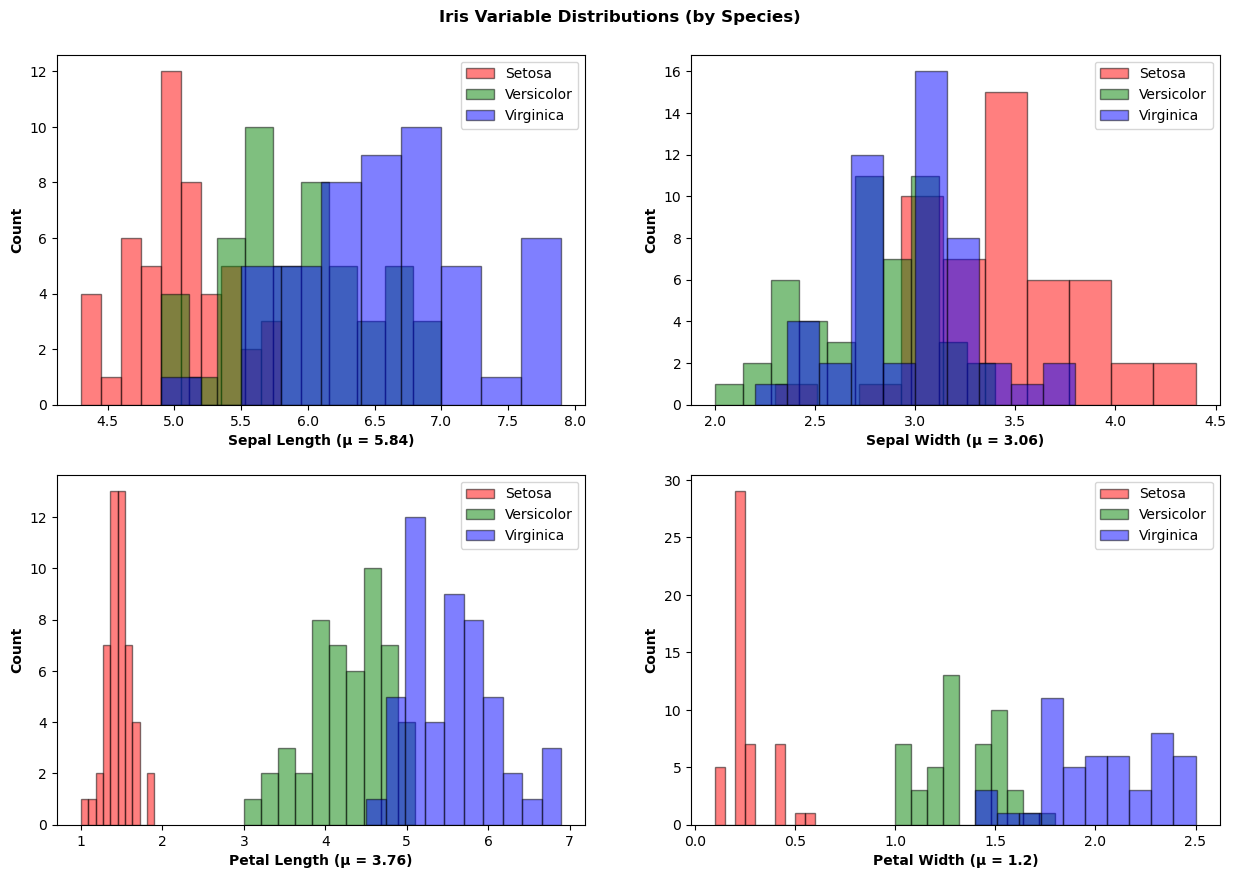

In [117]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html
# https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text.set_fontweight

# Create a new figure and sets of axes, split into 2 rows and 2 columns.
fig, ax = plt.subplots(2,2)

# Set figure title & size
fig.suptitle('Iris Variable Distributions (by Species)',y=.925,fontweight = 900)
fig.set_figheight(10)
fig.set_figwidth(15)

# Plot histograms of the four variables by species, each subplot has three histograms overlayed on each other.
# https://www.geeksforgeeks.org/overlapping-histograms-with-matplotlib-in-python/
ax[0,0].hist(setosa_df["sepal_length"], edgecolor='black', color="red", alpha=0.5)
ax[0,0].hist(versicolor_df["sepal_length"], edgecolor='black', color="green", alpha=0.5)
ax[0,0].hist(virginica_df["sepal_length"], edgecolor='black', color="blue", alpha=0.5)
ax[0,1].hist(setosa_df["sepal_width"], edgecolor='black', color="red", alpha=0.5)
ax[0,1].hist(versicolor_df["sepal_width"], edgecolor='black', color="green", alpha=0.5)
ax[0,1].hist(virginica_df["sepal_width"], edgecolor='black', color="blue", alpha=0.5)
ax[1,0].hist(setosa_df["petal_length"], edgecolor='black', color="red", alpha=0.5)
ax[1,0].hist(versicolor_df["petal_length"], edgecolor='black', color="green", alpha=0.5)
ax[1,0].hist(virginica_df["petal_length"], edgecolor='black', color="blue", alpha=0.5)
ax[1,1].hist(setosa_df["petal_width"], edgecolor='black', color="red", alpha=0.5)
ax[1,1].hist(versicolor_df["petal_width"], edgecolor='black', color="green", alpha=0.5)
ax[1,1].hist(virginica_df["petal_width"], edgecolor='black', color="blue", alpha=0.5)

# Set axis labels & legends for four subplots.
ax[0,0].set_xlabel("Sepal Length (μ = 5.84)", fontweight = 550)
ax[0,0].set_ylabel("Count", fontweight = 550)
ax[0,0].legend(['Setosa','Versicolor','Virginica'])
ax[0,1].set_xlabel("Sepal Width (μ = 3.06)", fontweight = 550)
ax[0,1].set_ylabel("Count", fontweight = 550)
ax[0,1].legend(['Setosa','Versicolor','Virginica'])
ax[1,0].set_xlabel("Petal Length (μ = 3.76)", fontweight = 550)
ax[1,0].set_ylabel("Count", fontweight = 550)
ax[1,0].legend(['Setosa','Versicolor','Virginica'])
ax[1,1].set_xlabel("Petal Width (μ = 1.2)", fontweight = 550)
ax[1,1].set_ylabel("Count", fontweight = 550)
ax[1,1].legend(['Setosa','Versicolor','Virginica'])

# Save to png
plt.savefig('Iris_dist_by_species.png')

Now that the histograms are generated per species, we can clearly see that both petal length and petal width are features which seperate the setosa species, with very little overlap in thse same two features amongst the versicolor and virginica species of Iris.

#### Scatterplots

***

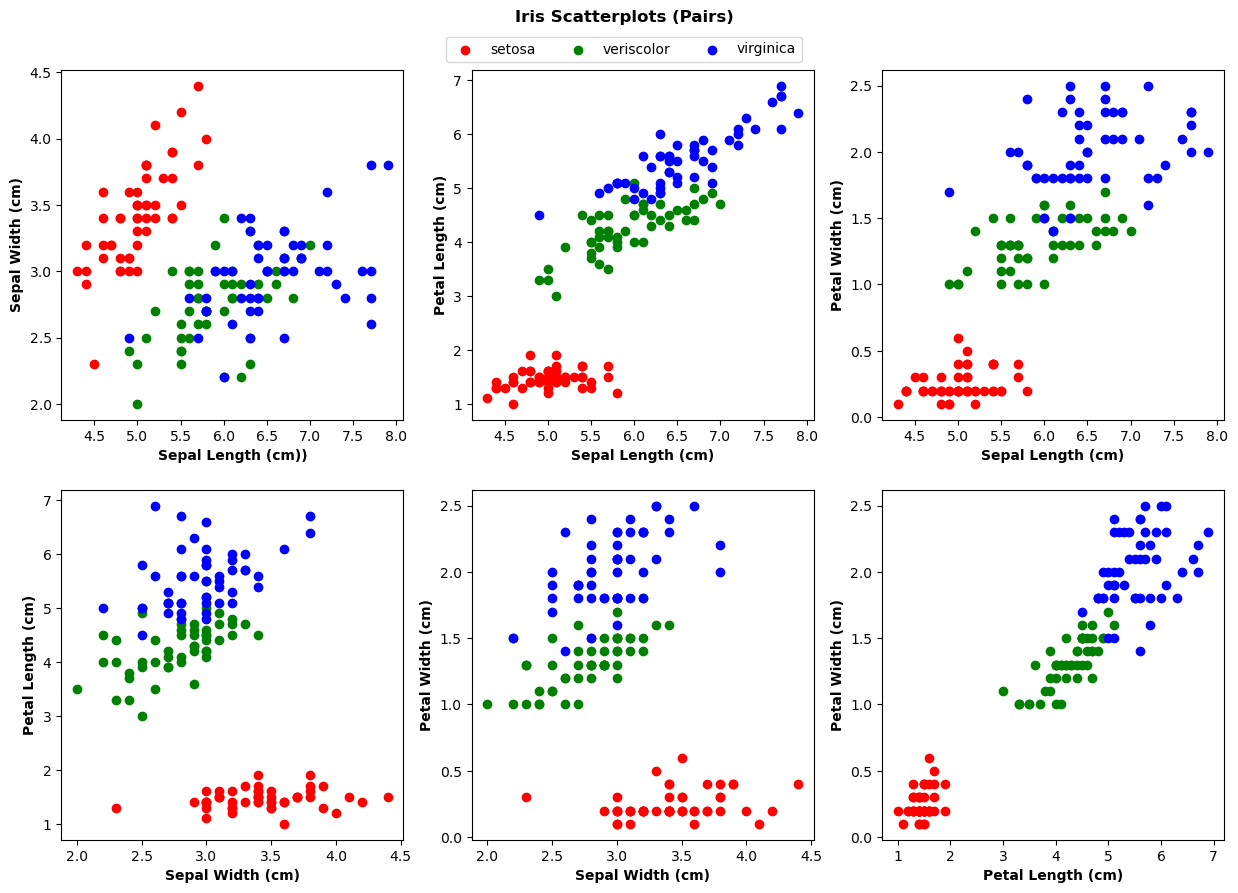

In [118]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

# Create a new figure and sets of axes, split into 2 rows and 3 columns.
fig, ax = plt.subplots(2,3)

# Set figure title, size & label
fig.suptitle('Iris Scatterplots (Pairs)', y=.94, fontweight = 900)
fig.set_figheight(10)
fig.set_figwidth(15)

# Plot each pair of variables (6 pairs in total) against each other in scatterplots.

# First Pair: sepal length vs. sepal width
ax[0,0].scatter(setosa_df["sepal_length"], setosa_df["sepal_width"], color="red")
ax[0,0].scatter(versicolor_df["sepal_length"], versicolor_df["sepal_width"], color="green")
ax[0,0].scatter(virginica_df["sepal_length"], virginica_df["sepal_width"], color="blue")
ax[0,0].set_xlabel("Sepal Length (cm))", fontweight = 550)
ax[0,0].set_ylabel("Sepal Width (cm)", fontweight = 550)

# Second Pair: sepal length vs. petal length
ax[0,1].scatter(setosa_df["sepal_length"], setosa_df["petal_length"], color="red")
ax[0,1].scatter(versicolor_df["sepal_length"], versicolor_df["petal_length"], color="green")
ax[0,1].scatter(virginica_df["sepal_length"], virginica_df["petal_length"], color="blue")
ax[0,1].set_xlabel("Sepal Length (cm)", fontweight = 550)
ax[0,1].set_ylabel("Petal Length (cm)", fontweight = 550)

# Third Pair: sepal length vs. petal width
ax[0,2].scatter(setosa_df["sepal_length"], setosa_df["petal_width"], color="red")
ax[0,2].scatter(versicolor_df["sepal_length"], versicolor_df["petal_width"], color="green")
ax[0,2].scatter(virginica_df["sepal_length"], virginica_df["petal_width"], color="blue")
ax[0,2].set_xlabel("Sepal Length (cm)", fontweight = 550)
ax[0,2].set_ylabel("Petal Width (cm)", fontweight = 550)

# Fourth Pair: sepal width vs. petal length
ax[1,0].scatter(setosa_df["sepal_width"], setosa_df["petal_length"], color="red")
ax[1,0].scatter(versicolor_df["sepal_width"], versicolor_df["petal_length"], color="green")
ax[1,0].scatter(virginica_df["sepal_width"], virginica_df["petal_length"], color="blue")
ax[1,0].set_xlabel("Sepal Width (cm)", fontweight = 550)
ax[1,0].set_ylabel("Petal Length (cm)", fontweight = 550)

# Fifth Pair: sepal width vs. petal width
ax[1,1].scatter(setosa_df["sepal_width"], setosa_df["petal_width"], color="red")
ax[1,1].scatter(versicolor_df["sepal_width"], versicolor_df["petal_width"], color="green")
ax[1,1].scatter(virginica_df["sepal_width"], virginica_df["petal_width"], color="blue")
ax[1,1].set_xlabel("Sepal Width (cm)", fontweight = 550)
ax[1,1].set_ylabel("Petal Width (cm)", fontweight = 550)

# Sixth Pair: petal length vs. petal width
ax[1,2].scatter(setosa_df["petal_length"], setosa_df["petal_width"], color="red")
ax[1,2].scatter(versicolor_df["petal_length"], versicolor_df["petal_width"], color="green")
ax[1,2].scatter(virginica_df["petal_length"], virginica_df["petal_width"], color="blue")
ax[1,2].set_xlabel("Petal Length (cm)", fontweight = 550)
ax[1,2].set_ylabel("Petal Width (cm)", fontweight = 550)

# Add legend to the figure with appropriate positioning
fig.legend(['setosa','veriscolor','virginica'], loc='upper center', bbox_to_anchor=(0.5,0.92), ncol=3)

# Save to png
plt.savefig('Iris_Scatterplots_2D.png')



From the above scatterplots, we can see that as long as one of the petal features is plotted, the setosa species is linearly seperable from the other two species. Versicolor and virginica are not linearly seperable. The petal length vs. petal width plot groups the species together most closely in clusters, with a strong correlation observable between this pair of features. 

Next, we will plot the data in 3-D to see if the addition of an additional feature helps distinguish the versicolor and virginica species.

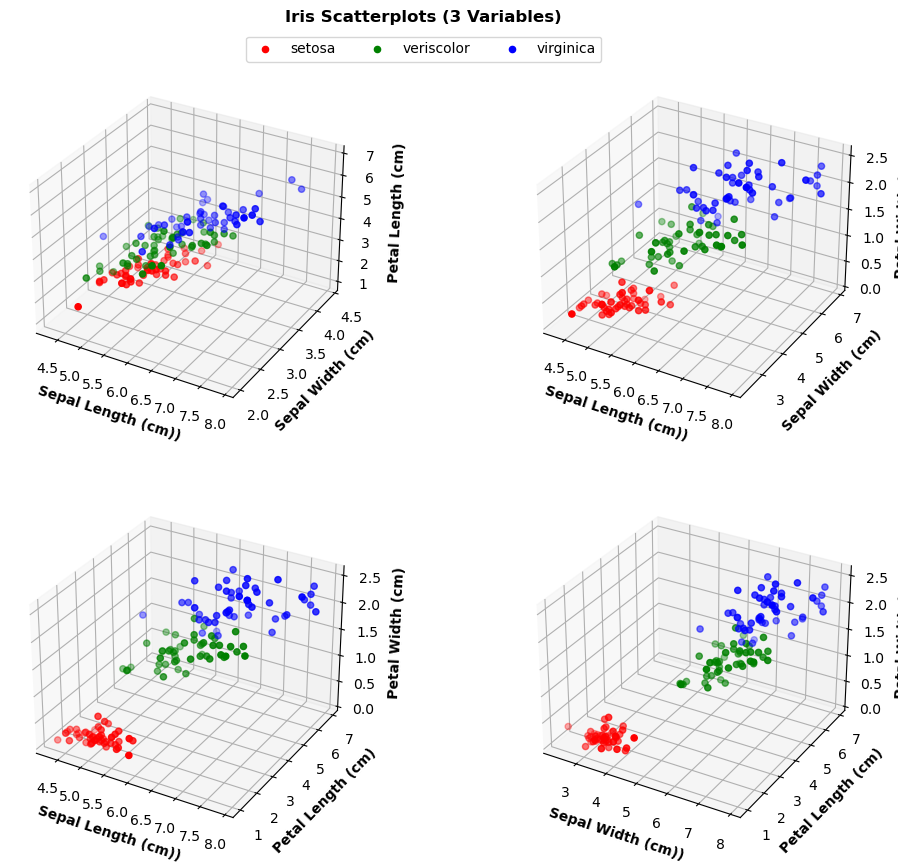

In [ ]:
# https://matplotlib.org/stable/plot_types/3D/scatter3d_simple.html#sphx-glr-plot-types-3d-scatter3d-simple-py
# https://stackoverflow.com/questions/77577613/matplotlib-3d-plot-z-label-cut-off
# https://www.geeksforgeeks.org/make-3d-interactive-matplotlib-plot-in-jupyter-notebook/

# To add the interactive features of matplotlib, we can run 'matplotlib widget' This enables zooming, panning etc. of the plots. 
# ipyml is a dependency and needs to be pip installed to enable this feature.
#%matplotlib widget

from mpl_toolkits import mplot3d

# Create a new figure and sets of axes, split into 2 rows and 2 columns.
fig, ax = plt.subplots(2,2,subplot_kw={"projection":"3d"})

# Set figure title, size & label
fig.suptitle('Iris Scatterplots (3 Variables)', y=.94, fontweight = 900)
fig.set_figheight(10)
fig.set_figwidth(12)

# First Trio: sepal length vs. sepal width vs. petal length
ax[0,0].scatter(setosa_df["sepal_length"], setosa_df["sepal_width"], setosa_df["petal_length"], color="red")
ax[0,0].scatter(versicolor_df["sepal_length"], versicolor_df["sepal_width"], versicolor_df["petal_length"], color="green")
ax[0,0].scatter(virginica_df["sepal_length"], virginica_df["sepal_width"], virginica_df["petal_length"], color="blue")
ax[0,0].set_xlabel("Sepal Length (cm))", fontweight = 550)
ax[0,0].set_ylabel("Sepal Width (cm)", fontweight = 550)
ax[0,0].set_zlabel("Petal Length (cm)", fontweight = 550)
#ax[0,0].set_box_aspect(None, zoom=0.85) --> This will make the plots fit on the jupyter console.

# Second Trio: sepal length vs. sepal width vs. petal width
ax[0,1].scatter(setosa_df["sepal_length"], setosa_df["sepal_width"], setosa_df["petal_width"], color="red")
ax[0,1].scatter(versicolor_df["sepal_length"], versicolor_df["petal_length"], versicolor_df["petal_width"], color="green")
ax[0,1].scatter(virginica_df["sepal_length"], virginica_df["petal_length"], virginica_df["petal_width"], color="blue")
ax[0,1].set_xlabel("Sepal Length (cm))", fontweight = 550)
ax[0,1].set_ylabel("Sepal Width (cm)", fontweight = 550)
ax[0,1].set_zlabel("Petal Width (cm)", fontweight = 550)
#ax[0,1].set_box_aspect(None, zoom=0.85)

# Third Trio: sepal length vs. petal length vs. petal width
ax[1,0].scatter(setosa_df["sepal_length"], setosa_df["petal_length"], setosa_df["petal_width"], color="red")
ax[1,0].scatter(versicolor_df["sepal_length"], versicolor_df["petal_length"], versicolor_df["petal_width"], color="green")
ax[1,0].scatter(virginica_df["sepal_length"], virginica_df["petal_length"], virginica_df["petal_width"], color="blue")
ax[1,0].set_xlabel("Sepal Length (cm))", fontweight = 550)
ax[1,0].set_ylabel("Petal Length (cm)", fontweight = 550)
ax[1,0].set_zlabel("Petal Width (cm)", fontweight = 550)
#ax[1,0].set_box_aspect(None, zoom=0.85)

# Fourth Trio: sepal width vs. petal length vs. petal width
ax[1,1].scatter(setosa_df["sepal_width"], setosa_df["petal_length"], setosa_df["petal_width"], color="red")
ax[1,1].scatter(versicolor_df["sepal_length"], versicolor_df["petal_length"], versicolor_df["petal_width"], color="green")
ax[1,1].scatter(virginica_df["sepal_length"], virginica_df["petal_length"], virginica_df["petal_width"], color="blue")
ax[1,1].set_xlabel("Sepal Width (cm))", fontweight = 550)
ax[1,1].set_ylabel("Petal Length (cm)", fontweight = 550)
ax[1,1].set_zlabel("Petal Width (cm)", fontweight = 550)
#ax[1,1].set_box_aspect(None, zoom=0.85)

# Add legend to the figure with appropriate positioning
fig.legend(['setosa','veriscolor','virginica'], loc='upper center', bbox_to_anchor=(0.5,0.92), ncol=3)

# Save to png
plt.savefig('Iris_Scatterplots_3D.png')

After petal length and petal width, sepal width appears to be the next best feature to use to classify the iris flowers into species. We can observe this in the forth plot (lower right) where the data is most grouped together in clusters.

## Correlation

***

[Correlation](https://en.wikipedia.org/wiki/Correlation) is a relationship, whether causal or not, between two random variables. It measures _"the degree to which a pair of variables are linearly related"_ i.e. the propensity of one variable's likelihood of change in response to a one unit change in the other variable.

Correlation Coefficient

$\rho = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y}$

where,

$\rho$ = [Pearson's product-moment correlation](https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php) coefficient\
${cov}(X,Y)$ = covariance of variables\
$\sigma_x$ = standard deviation of x\
$\sigma_y$ = standard deviation of y

Let's create a correlation matrix for all our numerical variables.

In [122]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
corr = df.corr(numeric_only=True)
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


As we observed on our scatter plots, petal length and petal width are the most strongly correlated pair of variables.

Heatmaps are a way of adding another layer of visualisation to the above table.

<Axes: >

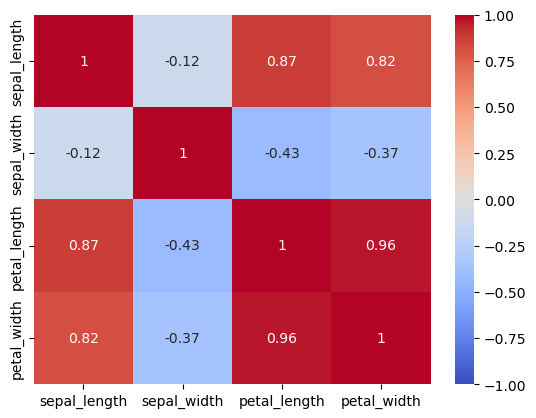

In [164]:
# Let's add a heatmap to visualise the table above
# https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/
# https://www.geeksforgeeks.org/colormaps-in-seaborn-heatmaps/

sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap='coolwarm')

In [130]:
# Breaking down correlations by species
df.groupby('species').corr(numeric_only=True)

sepal_length  sepal_width  petal_length  petal_width
species                                                                      
setosa     sepal_length      1.000000     0.742547      0.267176     0.278098
           sepal_width       0.742547     1.000000      0.177700     0.232752
           petal_length      0.267176     0.177700      1.000000     0.331630
           petal_width       0.278098     0.232752      0.331630     1.000000
versicolor sepal_length      1.000000     0.525911      0.754049     0.546461
           sepal_width       0.525911     1.000000      0.560522     0.663999
           petal_length      0.754049     0.560522      1.000000     0.786668
           petal_width       0.546461     0.663999      0.786668     1.000000
virginica  sepal_length      1.000000     0.457228      0.864225     0.281108
           sepal_width       0.457228     1.000000      0.401045     0.537728
           petal_length      0.864225     0.401045      1.000000     0.322108
           petal_width       0.281108     0.537728      0.322108     1.000000

## Machine Learning

***

We have seen from the above exploratory data analysis (EDA) that one class of the Iris species (setosa) can be linearly seperated from the other two (versicolor and virginica), whereas the latter two are not linearly seperable from each other. 

There are several machine learning classification techniques which aim to classify variables using non-linear techniques. [Principal Component Analysis (PCA) and Linear Discriminant Analysis(LDA)](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html) could be used to reduce dimensionality in our data from 4D to 2D, with the goal of maximising the seperation between the Iris species. 

The [scikit-learn cheat sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) suggests Linear SVC as the model of choice for our dataset. However, given linear regression has been ruled out as a suitable classification method from our EDA, a natural progression is to explore logistic regression next.

<div>
<img src="scikit-learn_ml_map.png" width="1200x">
<div>

## Logistic Regression

***

The following two resources have been heavily utilised for this section:
- [Classification Basics: Walk-through with the Iris Data Set](https://towardsdatascience.com/classification-basics-walk-through-with-the-iris-data-set-d46b0331bf82)
- [Iris Dataset Classification with Python: A Tutorial](https://www.pycodemates.com/2022/05/iris-dataset-classification-with-python.html)


To recap, we have already split our original Iris DataFrame into numeric (X) and categorical/target (y) data. For machine learning models, the target data needs to be represented as integeres. Let's encode the three species to integer values 0, 1 & 2.

In [146]:
# Alternatively we could use sklearn's Label Encoder for this: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
# We create a new list called 'target'. 
# Map each species to an integer value and add these values to target.

target = []

for i in y['species']:
    if i == "setosa":
        target.append(0)
    elif i == 'versicolor':
        target.append(1)
    else:
        target.append(2)

# Add additional 'target' column to y DataFrame, and set values equal to 'target' list
y['target'] = target

y

,species,target
0,setosa,0
1,setosa,0
2,setosa,0
3,setosa,0
4,setosa,0
...,...,...
145,virginica,2
146,virginica,2
147,virginica,2
148,virginica,2


The next step is to split our data into training data, to train our model, and test data, to test the model after it has been trained.

In [147]:
# Split the data into test and train using the sklearn library function imported
# We have not included the stratification flag given our categories are evenly proportioned.
# https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/
# https://stackoverflow.com/questions/42191717/scikit-learn-random-state-in-splitting-dataset

X_train, X_test, y_train, y_test = train_test_split(X, y['target'], test_size=0.3, random_state=0)


Now let's implement the Logisitc Regression model by fitting it on our training data, and then testing it against our test data. (We are treating the model like a black box here).

In [158]:
# create the model instance
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

log_reg = LogisticRegression()

# fit the model according to the given training data.
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit

log_reg.fit(X_train, y_train)

# return the mean accuracy on the given test data and labels.
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score

log_reg.score(X_test, y_test)

0.9777777777777777

Our model is predicting the correct species of Iris 97.77% of the time on our test data.

In [165]:
# Confusion Matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict

predictions = log_reg.predict(X_test)
confusion = pd.DataFrame(confusion_matrix(y_test, predictions, labels=[0, 1, 2]),index=[0, 1, 2], columns=[0, 1, 2])
confusion

,0,1,2
0,16,0,0
1,0,17,1
2,0,0,11


**Confusion Matrix Interpretation**
- There were 16 setosas in our test data, and all of these were predicted successfully by our model.
- There were 18 versicolors in our test data, 17 were predicted correctly with one mis-classified as a virginica.
- There weere 11 virginicas in our test data, all of which were predicted successfully by our model. 

## Summary

***

To recap, we begain this project by importing the Iris data set and used it to create a pandas DataFrame from which we performed Exploratory Data Analysis (EDA).
Our key findings during EDA were:
- The Iris data set is well formed: even distribution of the species, no missing values, relatively normal distributions of the numeric variables.
- Petal Length and Petal Width are the best classiication features to predict a species.
- One class of the Iris species (setosa) can be linearly seperated from the other two (versicolor and virginica), whereas the latter two are not linearly seperable from each other. 

In order to classify the species using non-linear classification techniques, we employed the Logistic Regression Machine Learning model.
We trained our model on 105 observations (70%v of our data).
Out of the 45 observations left for testing, our model predicted 44 species correctly (97.78%) and predicted one incorrectly (2.22%).

Extension of this work:
- Develop 'Outliers?' Check further.
- Some of the code used for data load, variable summary, and visualisation could be generalised to work with data sets other than the Iris dataset.
- Several other ML techniquest could be explored and compared against Logistic Regression.

## End

***